<a href="https://colab.research.google.com/github/lowtech1/test/blob/main/Buoi5_Phan_Cum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phân Cụm

In [1]:
#pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

Tạo tập dữ liệu gồm 2 thuộc tính. Dữ liệu gồm 3 cụm, mỗi cụm có 100 điểm dữ liệu,

mỗi điểm dữ liệu có 2 chiều. Phân bố dữ liệu: phân bố tự nhiên với mean và std lần lượt

là (5, 3), (15, 5) và (-5, 2)

In [6]:
np.random.seed(5)
c1 = np.random.normal(5,3,(100,2))
c2 = np.random.normal(15,5,(100,2))
c3 = np.random.normal(-5,2,(100,2))
outlier = np.array([[100,100]])
dataset_outlier = np.concatenate((c1,c2,c3,outlier),axis =0)

Áp dụng K-means

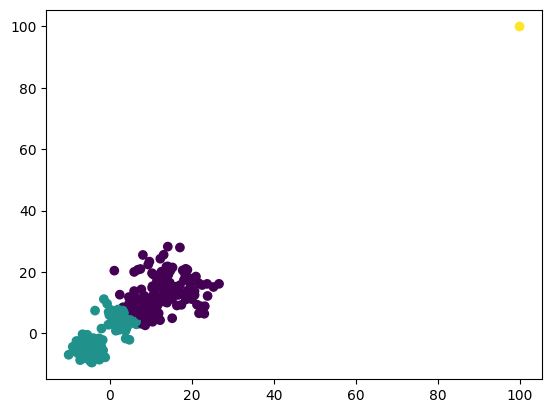

0.5331790219895561


In [8]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(dataset_outlier)
plt.scatter(dataset_outlier[:,0],dataset_outlier[:,1],c=kmeans.labels_)
plt.show()

silhouette_score_kmeans = silhouette_score(dataset_outlier,kmeans.labels_)
print(silhouette_score_kmeans)

Áp dụng kmedoids

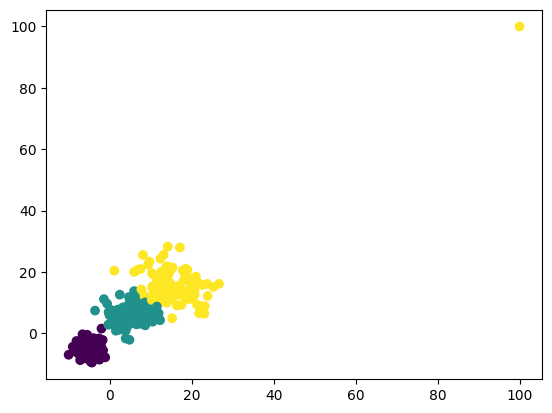

0.5689289713210703


In [9]:
kmedoids = KMedoids(n_clusters=3,random_state=0)
kmedoids.fit(dataset_outlier)
plt.scatter(dataset_outlier[:,0],dataset_outlier[:,1],c=kmedoids.labels_)
plt.show()

silhouette_score_kmedoids = silhouette_score(dataset_outlier,kmedoids.labels_)
print(silhouette_score_kmedoids)

Hai phương pháp cho kết quả tương tự nhau.

-Thêm vào 1 ourlier

In [10]:
np.random.seed(5)
c1 = np.random.normal(5,3,(100,2))
c2 = np.random.normal(15,5,(100,2))
c3 = np.random.normal(-5,2,(100,2))
outlier = np.array([[100,100]])
dataset_outlier = np.concatenate((c1,c2,c3,outlier),axis =0)

Áp dụng kmeans và kmedoids với k = 3. Đánh giá về việc phân cụm có thêm outlier.

Lựa chọn k

Với elbow method: chọn k tại giá trị khủy

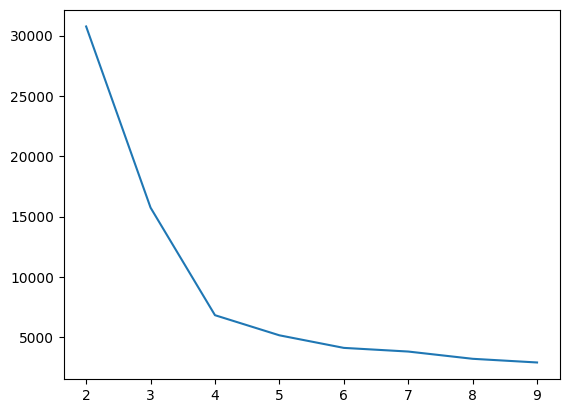

In [11]:
wcss =[]
for k in range(2,10):
  kmeans =KMeans(n_clusters=k, random_state=0)
  wa = kmeans.fit(dataset_outlier)
  wcss.append(kmeans.inertia_)

plt.plot(range(2,10),wcss)
plt.show()

Dựa trên Silhouette Analysis

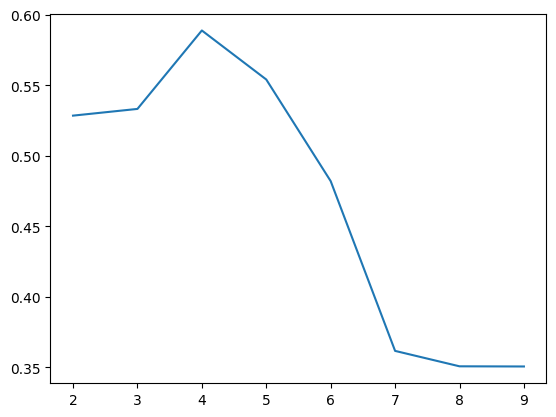

In [12]:
silhouettes = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k, random_state=0)
  wa = kmeans.fit(dataset_outlier)
  silhouettes.append(silhouette_score(dataset_outlier,kmeans.labels_))
plt.plot(range(2,10),silhouettes)
plt.show()

Trực quan 2 phương pháp

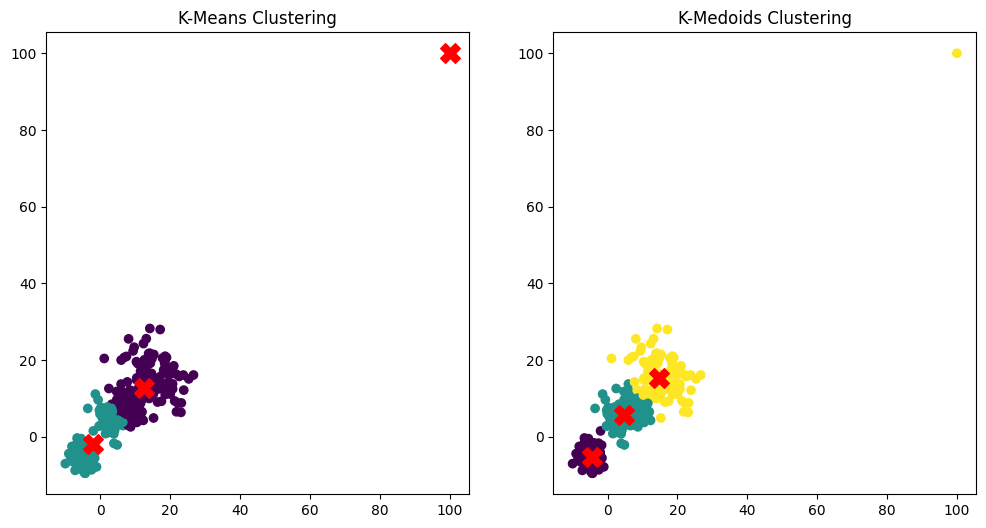

In [13]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(dataset_outlier)

medoids = KMedoids(n_clusters=3, random_state=0)
medoids.fit(dataset_outlier)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(dataset_outlier[:,0],dataset_outlier[:,1],c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='X',c='red',s=200,label = 'Centroids')
plt.title('K-Means Clustering')
plt.subplot(122)
plt.scatter(dataset_outlier[:,0],dataset_outlier[:,1],c=medoids.labels_, cmap='viridis')
plt.scatter(medoids.cluster_centers_[:,0],medoids.cluster_centers_[:,1],marker='X',c='red',s=200,label = 'Centroids')
plt.title('K-Medoids Clustering')
plt.show()


Áp dụng phân cụm với các tập dữ liệu

2. Phân dụm dựa trên phân cấp

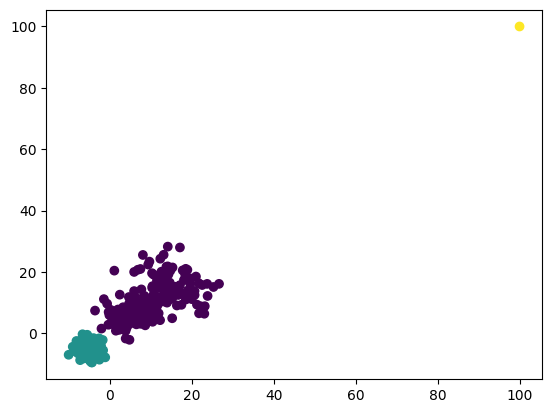

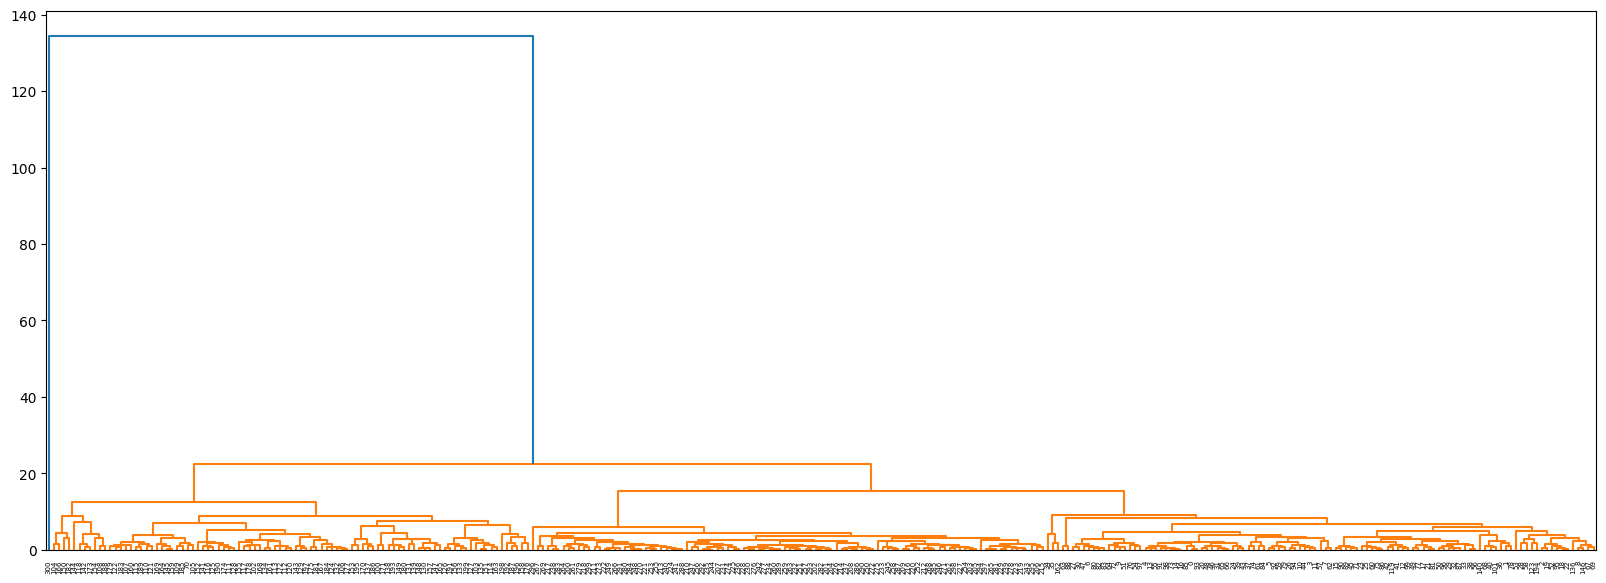

In [14]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(dataset_outlier)
plt.scatter(dataset_outlier[:,0],dataset_outlier[:,1],c=ac.labels_)
plt.show()

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,7))
dendrogram = sch.dendrogram(sch.linkage(dataset_outlier,method='average'))
plt.show()

3. Phân cụm dựa trên mật độ

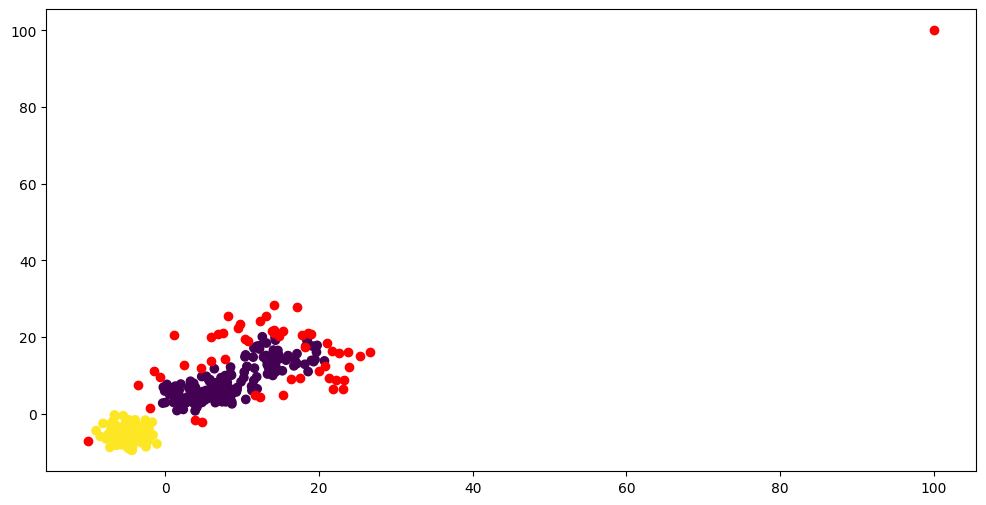

In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3,min_samples=10)
dbscan.fit(dataset_outlier)

core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

X = dataset_outlier[core_samples_mask]
X_labels = labels[core_samples_mask]

Y = dataset_outlier[~core_samples_mask]
Y_labels = labels[~core_samples_mask]

plt.figure(figsize=(12,6))

plt.scatter(X[:,0],X[:,1],c=X_labels)
plt.scatter(Y[:,0],Y[:,1], c = 'red' )
plt.show()
